In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fixed_income_derivatives_E2024 as fid

# Definér filstierne til de relevante datasæt
Yield_Curve_3M  = "/Users/williammousten/Desktop/ECB/ECB_3M.csv"
Yield_Curve_6M  = "/Users/williammousten/Desktop/ECB/ECB_6M.csv"
Yield_Curve_1Y  = "/Users/williammousten/Desktop/ECB/ECB_1Y.csv"
Yield_Curve_2Y  = "/Users/williammousten/Desktop/ECB/ECB_2Y.csv"
Yield_Curve_5Y  = "/Users/williammousten/Desktop/ECB/ECB_5Y.csv"
Yield_Curve_10Y = "/Users/williammousten/Desktop/ECB/ECB_10Y.csv"
Yield_Curve_15Y = "/Users/williammousten/Desktop/ECB/ECB_15Y.csv"
Yield_Curve_20Y = "/Users/williammousten/Desktop/ECB/ECB_20Y.csv"
Yield_Curve_30Y = "/Users/williammousten/Desktop/ECB/ECB_30Y.csv"

def load_and_rename(csv_path, yield_col_new_name, date_col="DATE"):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col])
    old_yield_col = df.columns[-1]
    df = df.rename(columns={old_yield_col: yield_col_new_name})
    return df[[date_col, yield_col_new_name]]

# Indlæs datasæt
df_3m  = load_and_rename(Yield_Curve_3M,  "3M")
df_6m  = load_and_rename(Yield_Curve_6M,  "6M")
df_1y  = load_and_rename(Yield_Curve_1Y,  "1Y")
df_2y  = load_and_rename(Yield_Curve_2Y,  "2Y")
df_5y  = load_and_rename(Yield_Curve_5Y,  "5Y")
df_10y = load_and_rename(Yield_Curve_10Y, "10Y")
df_15y = load_and_rename(Yield_Curve_15Y, "15Y")
df_20y = load_and_rename(Yield_Curve_20Y, "20Y")
df_30y = load_and_rename(Yield_Curve_30Y, "30Y")

# Merge og sorter
dfs = [df_3m, df_6m, df_1y, df_2y, df_5y, df_10y, df_15y, df_20y, df_30y]
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, how="outer", on="DATE")

df_merged = df_merged.sort_values(by="DATE").reset_index(drop=True)

# Filtrér efter dato mellem 1/1/2005 og 1/1/2025
start_date = pd.Timestamp("2005-01-01")
end_date = pd.Timestamp("2025-01-01")
df_merged = df_merged[(df_merged["DATE"] >= start_date) & (df_merged["DATE"] < end_date)]

# Reordn kolonner
ordered_columns = ["DATE", "3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
df_merged = df_merged[ordered_columns]

print(df_merged.head(10))
print(df_merged.columns)

         DATE        3M        6M        1Y        2Y        5Y       10Y  \
85 2005-01-03  2.109629  2.151024  2.239782  2.430961  2.993412  3.661840   
86 2005-01-04  2.055906  2.115073  2.231982  2.457144  3.034202  3.668323   
87 2005-01-05  2.064858  2.126695  2.248179  2.479969  3.064513  3.695968   
88 2005-01-06  2.060515  2.107919  2.207488  2.415567  2.998407  3.652554   
89 2005-01-07  2.048016  2.092720  2.187889  2.390159  2.967263  3.621110   
90 2005-01-10  2.034898  2.081488  2.179831  2.386555  2.968441  3.621085   
91 2005-01-11  2.062037  2.107914  2.204538  2.407134  2.976360  3.615339   
92 2005-01-12  2.062085  2.108843  2.206971  2.411769  2.984051  3.624260   
93 2005-01-13  2.052742  2.090332  2.174735  2.365086  2.936373  3.588908   
94 2005-01-14  2.056923  2.097316  2.185829  2.379951  2.945857  3.580548   

         15Y       20Y       30Y  
85  4.041248  4.261873  4.493401  
86  4.025906  4.236022  4.458392  
87  4.048378  4.254532  4.472248  
88  4.008271

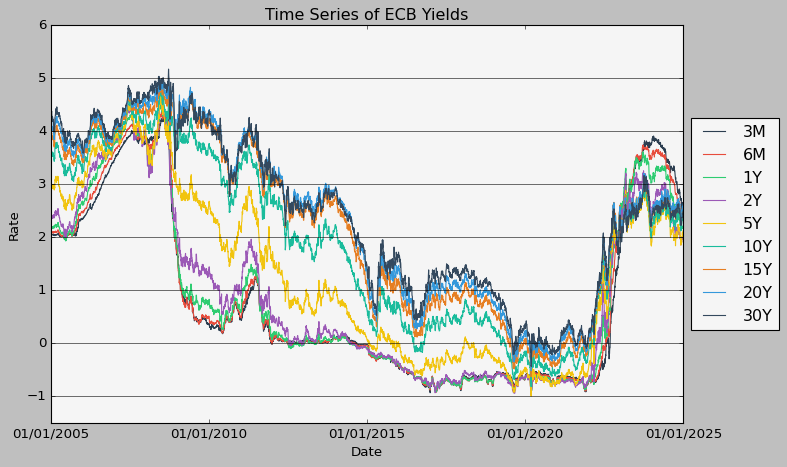

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Opdateret liste med de valgte yield-maturities
ordered_columns = ["DATE", "3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

plt.style.use('classic')  # Klassisk stil

fig, ax = plt.subplots(figsize=(10, 6))

# Ændret baggrundsfarve til en lysere grå for plottet
ax.set_facecolor('whitesmoke')

# Vis kun vandrette gitterlinjer, og lad dem være sorte
ax.yaxis.grid(True, color='black', linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)  # Fjern lodrette gitterlinjer

# Formatér x-aksen til datoer
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Angiv start- og slutdato
start_date = pd.Timestamp("2005-01-01")
end_date = pd.Timestamp("2025-01-01")
ax.set_xlim([start_date, end_date])

# Udvælg yield-kolonnerne (ekskl. DATE)
yield_columns = ordered_columns[1:]

# Definer farver – én for hver yield-kurve
colors = [
    '#2C3E50',  # Dark Blue Gray
    '#E74C3C',  # Pomegranate Red
    '#2ECC71',  # Emerald Green
    '#9B59B6',  # Amethyst Purple
    '#F1C40F',  # Sunflower Yellow
    '#1ABC9C',  # Turquoise
    '#E67E22',  # Carrot Orange
    '#3498DB',  # Peter River Blue
    '#34495E'   # Wet Asphalt
]

# Plot hver kurve
for col, color in zip(yield_columns, colors):
    ax.plot(df_merged["DATE"], df_merged[col], label=col, color=color)

# Titler og akser
ax.set_title("Time Series of ECB Yields")
ax.set_xlabel("Date")
ax.set_ylabel("Rate")
plt.ylim(bottom=-1.5)

# Legend
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set_facecolor('whitesmoke')

# Undgå at legend bliver klippet
fig.tight_layout()

plt.show()

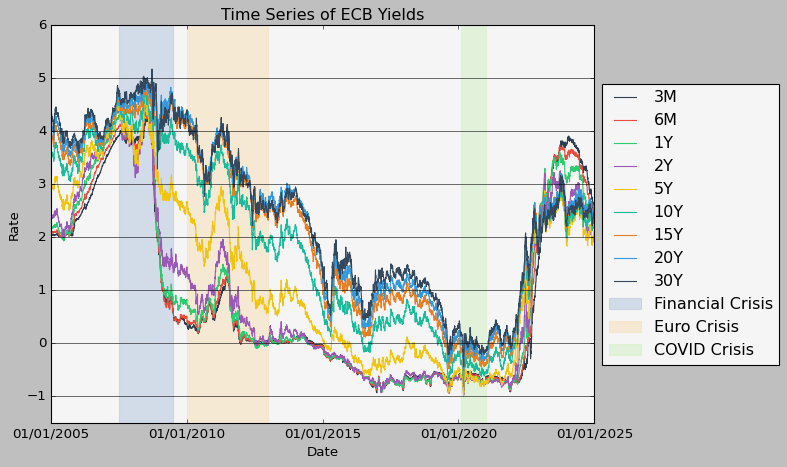

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Opdateret liste med de valgte yield-maturities
ordered_columns = ["DATE", "3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

plt.style.use('classic')  # Klassisk stil

fig, ax = plt.subplots(figsize=(10, 6))

# Ændret baggrundsfarve til en lysere grå for plottet
ax.set_facecolor('whitesmoke')

# Vis kun vandrette gitterlinjer, og lad dem være sorte
ax.yaxis.grid(True, color='black', linestyle='-', linewidth=0.5)
ax.xaxis.grid(False)  # Fjern lodrette gitterlinjer

# Formatér x-aksen til datoer
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Angiv start- og slutdato
start_date = pd.Timestamp("2005-01-01")
end_date = pd.Timestamp("2025-01-01")
ax.set_xlim([start_date, end_date])

# Udvælg yield-kolonnerne (ekskl. DATE)
yield_columns = ordered_columns[1:]

# Definer farver – én for hver yield-kurve
colors = [
    '#2C3E50',  # Dark Blue Gray
    '#E74C3C',  # Pomegranate Red
    '#2ECC71',  # Emerald Green
    '#9B59B6',  # Amethyst Purple
    '#F1C40F',  # Sunflower Yellow
    '#1ABC9C',  # Turquoise
    '#E67E22',  # Carrot Orange
    '#3498DB',  # Peter River Blue
    '#34495E'   # Wet Asphalt
]

# Plot hver kurve
for col, color in zip(yield_columns, colors):
    ax.plot(df_merged["DATE"], df_merged[col], label=col, color=color)

# === Marker kriser med farvede områder ===
# Marker kriser med mere neutrale farver
# Marker kriser med vertikale stiplede linjer
# Marker kriser med mere neutrale farver
ax.axvspan(pd.to_datetime("2007-07-01"), pd.to_datetime("2009-06-30"), color="#B0C4DE", alpha=0.5, label="Financial Crisis")
ax.axvspan(pd.to_datetime("2010-01-01"), pd.to_datetime("2012-12-31"), color="#F5DEB3", alpha=0.5, label="Euro Crisis")
ax.axvspan(pd.to_datetime("2020-02-01"), pd.to_datetime("2020-12-31"), color="#D0F0C0", alpha=0.5, label="COVID Crisis")

# Titler og akser
ax.set_title("Time Series of ECB Yields")
ax.set_xlabel("Date")
ax.set_ylabel("Rate")
plt.ylim(bottom=-1.5)

# Legend
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
leg.get_frame().set_facecolor('whitesmoke')

# Undgå at legend bliver klippet
fig.tight_layout()

plt.show()


In [13]:
print(df_merged.head())  # Tjek første par rækker
print(df_merged.info())  # Se datatype-info for at bekræfte at alle rentesatser er floats

         DATE        3M        6M        1Y        2Y        5Y       10Y  \
85 2005-01-03  2.109629  2.151024  2.239782  2.430961  2.993412  3.661840   
86 2005-01-04  2.055906  2.115073  2.231982  2.457144  3.034202  3.668323   
87 2005-01-05  2.064858  2.126695  2.248179  2.479969  3.064513  3.695968   
88 2005-01-06  2.060515  2.107919  2.207488  2.415567  2.998407  3.652554   
89 2005-01-07  2.048016  2.092720  2.187889  2.390159  2.967263  3.621110   

         15Y       20Y       30Y  
85  4.041248  4.261873  4.493401  
86  4.025906  4.236022  4.458392  
87  4.048378  4.254532  4.472248  
88  4.008271  4.210780  4.421138  
89  3.977092  4.179653  4.389998  
<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 85 to 5194
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    5110 non-null   datetime64[ns]
 1   3M      5110 non-null   float64       
 2   6M      5110 non-null   float64       
 3  

In [14]:
latest_row = df_merged.iloc[-1]  
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])  
maturities = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
R = np.array([latest_row[col] if col in latest_row and pd.notna(latest_row[col]) else np.nan for col in maturities], dtype=float)
calibration_date = pd.to_datetime(latest_row["DATE"]).date()
print("Calibration date:", calibration_date)
print("T:", T)
print("R:", R)

Calibration date: 2024-12-30
T: [ 0.25  0.5   1.    2.    5.   10.   15.   20.   30.  ]
R: [2.575177 2.401606 2.178646 2.011151 2.130018 2.447304 2.598727 2.629104
 2.513773]


In [15]:
import numpy as np
import pandas as pd

# Updated list with the selected yield maturities
yield_cols = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

desc_stats = {
    "Mean": [],
    "Std Error": [],
    "Median": [],
    "Mode": [],
    "Std Dev": [],
    "Variance": [],
    "Kurtosis": [],
    "Skewness": [],
    "Range": [],
    "Min": [],
    "Max": [],
    "Count": []
}

# Compute descriptive statistics for each yield maturity
for col in yield_cols:
    data = df_merged[col].dropna()
    mode_vals = data.mode()
    mode_val = mode_vals.iloc[0] if len(mode_vals) > 0 else np.nan

    desc_stats["Mean"].append(data.mean())
    desc_stats["Std Error"].append(data.std(ddof=1) / np.sqrt(len(data)))
    desc_stats["Median"].append(data.median())
    desc_stats["Mode"].append(mode_val)
    desc_stats["Std Dev"].append(data.std(ddof=1))
    desc_stats["Variance"].append(data.var(ddof=1))
    desc_stats["Kurtosis"].append(data.kurtosis())
    desc_stats["Skewness"].append(data.skew())
    desc_stats["Range"].append(data.max() - data.min())
    desc_stats["Min"].append(data.min())
    desc_stats["Max"].append(data.max())
    desc_stats["Count"].append(len(data))  # or data.count()

# Create DataFrame & transpose so that stats are rows and maturities are columns
df_stats = pd.DataFrame(desc_stats).T
df_stats.columns = yield_cols

# Convert "Count" row to integer
df_stats.loc["Count"] = df_stats.loc["Count"].astype(int)

# Display the statistics
print(df_stats)

                    3M           6M           1Y           2Y           5Y  \
Mean          0.833540     0.854377     0.887082     0.962656     1.336117   
Std Error     0.022923     0.023119     0.023052     0.022616     0.022100   
Median        0.073878     0.084537     0.118223     0.298382     1.060883   
Mode         -0.645387    -0.743762    -0.742734    -0.723510    -0.680158   
Std Dev       1.638628     1.652610     1.647885     1.616716     1.579775   
Variance      2.685103     2.731119     2.715526     2.613772     2.495690   
Kurtosis     -0.878500    -0.938109    -0.972343    -1.022177    -1.274575   
Skewness      0.808205     0.775374     0.716578     0.589456     0.253827   
Range         5.255438     5.271636     5.452536     5.684371     5.726582   
Min          -0.929979    -0.914679    -0.912983    -0.970607    -0.996219   
Max           4.325459     4.356957     4.539553     4.713764     4.730363   
Count      5110.000000  5110.000000  5110.000000  5110.000000  5

Calibration Date: 2024-12-30
Maturities (T): [ 0.25  0.5   1.    2.    5.   10.   15.   20.   30.  ]
Market Spot Rates (decimal): [0.02575177 0.02401606 0.02178646 0.02011151 0.02130018 0.02447304
 0.02598727 0.02629104 0.02513773]

=== Vasicek Calibration Results ===
r0    =  0.02117087076618928
a     =  0.04805487052861328
b     =  0.0043793190735005125
sigma =  0.016812822395796817

Market vs. Vasicek-Fitted Spot Rates:
   Maturity (years)  Market Rate (%)  Vasicek Model Rate (%)
0              0.25         2.575177                2.268503
1              0.50         2.401606                2.272828
2              1.00         2.178646                2.281374
3              2.00         2.011151                2.298064
4              5.00         2.130018                2.345074
5             10.00         2.447304                2.414248
6             15.00         2.598727                2.473573
7             20.00         2.629104                2.524626
8             30.00     

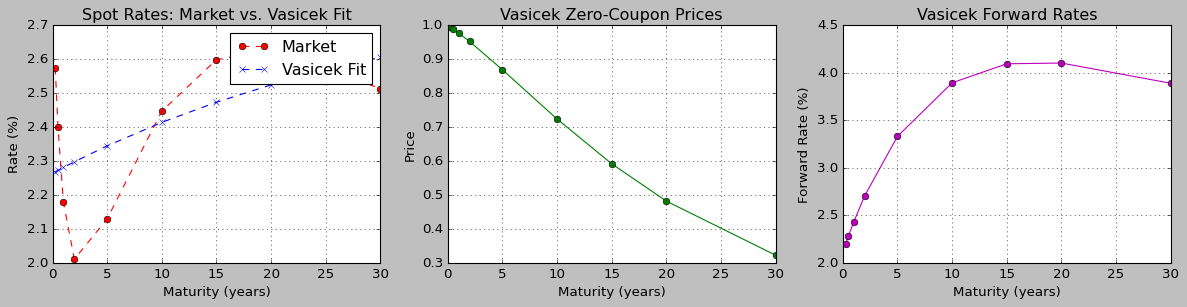

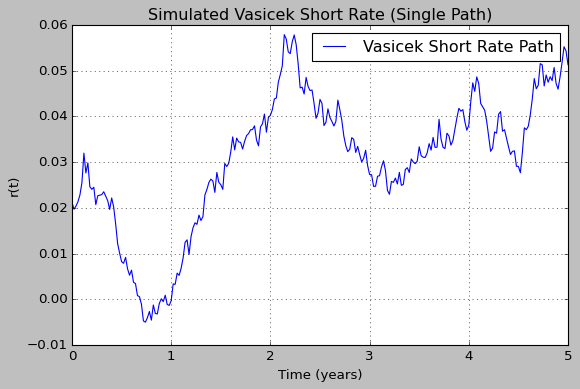

In [16]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fixed_income_derivatives_E2024 as fid

# =========================================
# 1) Extract Market Data for Calibration (Latest Available Date)
# =========================================

# Sørg for, at DATE-kolonnen er i datetime-format
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"])

# Hent den seneste tilgængelige række i dataene
latest_row = df_merged.iloc[-1]

# Hent kalibreringsdatoen
calibration_date = latest_row["DATE"].date()

# Definer løbetider i år
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])

# Hent de tilsvarende spot-renter og konverter til decimalform
maturities = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
R_market = latest_row[maturities].astype(float).values / 100.0  # Konverter fra % til decimal

print("Calibration Date:", calibration_date)
print("Maturities (T):", T)
print("Market Spot Rates (decimal):", R_market)

# =========================================
# 2) Vasicek Calibration
# =========================================
# Initial guess for (r0, a, b, sigma). 
# r0 is typically R_market[0], and a, b, sigma > 0
initial_guess = [R_market[0], 0.2, 0.03, 0.01]

# Use Nelder-Mead for robustness
res = minimize(
    lambda params: fid.fit_vasicek_obj(params, R_market, T),
    x0=initial_guess,
    method='Nelder-Mead'
)

r0_v, a_v, b_v, sigma_v = res.x

print("\n=== Vasicek Calibration Results ===")
print("r0    = ", r0_v)
print("a     = ", a_v)
print("b     = ", b_v)
print("sigma = ", sigma_v)

# =========================================
# 3) Compare Model vs. Market Spot Rates
# =========================================
R_vasicek = fid.spot_rate_vasicek(r0_v, a_v, b_v, sigma_v, T)

df_compare = pd.DataFrame({
    "Maturity (years)": T,
    "Market Rate (%)": R_market * 100,
    "Vasicek Model Rate (%)": R_vasicek * 100
})
print("\nMarket vs. Vasicek-Fitted Spot Rates:")
print(df_compare)

# =========================================
# 4) Get Vasicek Zero-Coupon and Forward Rates
# =========================================
zcb_prices = fid.zcb_price_vasicek(r0_v, a_v, b_v, sigma_v, T)
fwd_rates = fid.forward_rate_vasicek(r0_v, a_v, b_v, sigma_v, T)

df_vas = pd.DataFrame({
    "Maturity (years)": T,
    "ZCB Price (Vasicek)": zcb_prices,
    "Forward Rate (Vasicek) %": fwd_rates * 100
})
print("\nVasicek Zero-Coupon Bond Prices and Forward Rates:")
print(df_vas)

# =========================================
# 5) Plot: Market vs. Fitted Spot Rates, ZCB, and Forward
# =========================================
fig, axs = plt.subplots(1, 3, figsize=(15,4))

# (a) Spot Rates Comparison
axs[0].plot(T, R_market*100, 'ro--', label='Market')
axs[0].plot(T, R_vasicek*100, 'bx--', label='Vasicek Fit')
axs[0].set_title("Spot Rates: Market vs. Vasicek Fit")
axs[0].set_xlabel("Maturity (years)")
axs[0].set_ylabel("Rate (%)")
axs[0].grid(True)
axs[0].legend()

# (b) Zero-Coupon Bond Prices
# (b) Zero-Coupon Bond Prices
axs[1].plot(T, zcb_prices, 'g-o')
axs[1].set_title("Vasicek Zero-Coupon Prices")
axs[1].set_xlabel("Maturity (years)")
axs[1].set_ylabel("Price")
axs[1].grid(True)

# (c) Forward Rates
axs[2].plot(T, fwd_rates*100, 'm-o')
axs[2].set_title("Vasicek Forward Rates")
axs[2].set_xlabel("Maturity (years)")
axs[2].set_ylabel("Forward Rate (%)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

# =========================================
# 6) Simulate a Single Vasicek Short-Rate Path
# =========================================
M = 250   # number of time steps
T_sim = 5 # years
r_path = fid.simul_vasicek(r0_v, a_v, b_v, sigma_v, M, T_sim, method="exact")

time_grid = np.linspace(0, T_sim, M+1)
plt.figure(figsize=(8,5))
plt.plot(time_grid, r_path, label='Vasicek Short Rate Path')
plt.title("Simulated Vasicek Short Rate (Single Path)")
plt.xlabel("Time (years)")
plt.ylabel("r(t)")
plt.grid(True)
plt.legend()
plt.show()


📊 Average Vasicek Parameters:
r0    = 0.4692%
a     = 0.2958
b     = 1.1854%
sigma = 3.6278%

📉 Overall RMSE: 0.001324
📉 Overall MAE : 0.001034


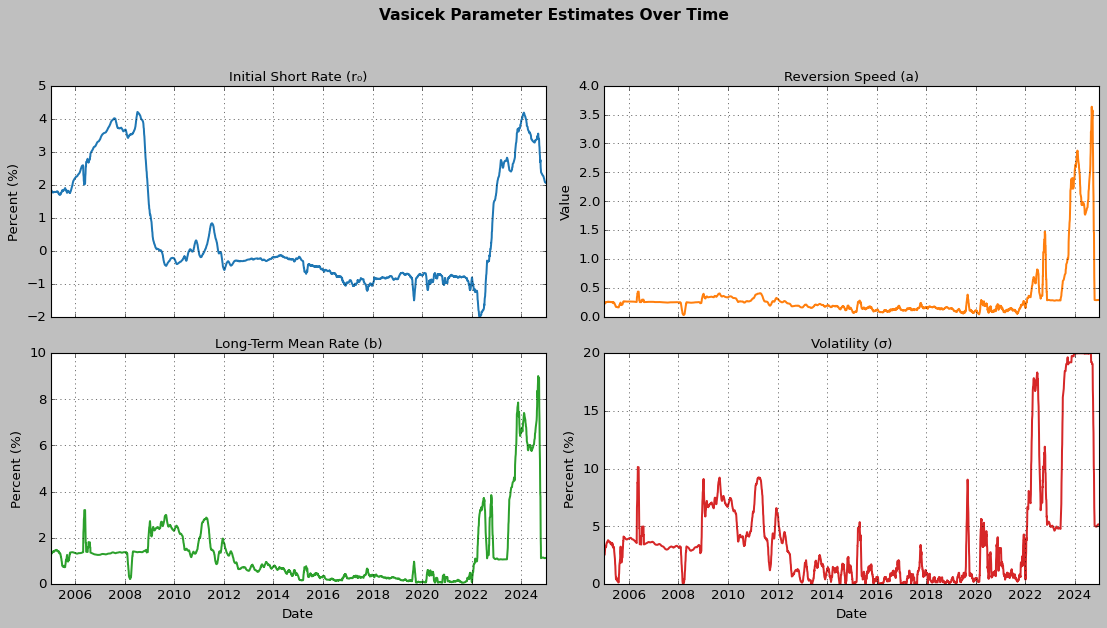

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
import fixed_income_derivatives_E2024 as fid

# === 1) Prepare data ===
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"])
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])
rates_cols = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
R_market_series = df_merged[rates_cols].values / 100.0
dates = df_merged["DATE"]

params = []       # To store parameter estimates
rmse_list = []    # To store RMSE and MAE

# === 2) Loop through all dates and calibrate Vasicek ===
for i, row in enumerate(R_market_series):
    R_market = row
    date_i = dates.iloc[i]
    init_guess = [R_market[0], 0.2, 0.03, 0.01]

    res = minimize(
    lambda p: fid.fit_vasicek_obj(p, R_market, T),
    x0=init_guess,
    method="L-BFGS-B",
    bounds = [
    (-0.02, 0.10),   # r0: initial short rate, allows for slightly negative rates
    (0.001, 5.0),    # a: mean reversion speed, must be strictly positive
    (-0.02, 0.10),   # b: long-term mean rate, allows for low/negative rates
    (0.0001, 0.20)   # sigma: volatility, must be strictly positive
    ]
)


    if res.success:
        r0, a, b, sigma = res.x
        params.append([date_i, r0, a, b, sigma])

        R_model = fid.spot_rate_vasicek(r0, a, b, sigma, T)
        rmse = np.sqrt(np.mean((R_market - R_model) ** 2))
        mae = np.mean(np.abs(R_market - R_model))
        rmse_list.append([date_i, rmse, mae])
    else:
        print(f"⚠️ Optimization failed for date {date_i}")

# === 3) Convert to DataFrames ===
df_params = pd.DataFrame(params, columns=["DATE", "r0", "a", "b", "sigma"]).set_index("DATE")
df_errors = pd.DataFrame(rmse_list, columns=["DATE", "RMSE", "MAE"]).set_index("DATE")

# === 4) Remove outliers (e.g., sigma > 20%) ===
df_params_clean = df_params[df_params["sigma"] < 0.2]
valid_dates = df_params_clean.index
df_errors_clean = df_errors.loc[valid_dates]

# === 5) Calculate average parameters (cleaned) ===
avg = df_params_clean.mean()
print("\n📊 Average Vasicek Parameters:")
print(f"r0    = {avg['r0'] * 100:.4f}%")
print(f"a     = {avg['a']:.4f}")
print(f"b     = {avg['b'] * 100:.4f}%")
print(f"sigma = {avg['sigma'] * 100:.4f}%")

# === 6) Overall error metrics ===
rmse_all = np.sqrt(np.mean(df_errors_clean["RMSE"]**2))
mae_all  = df_errors_clean["MAE"].mean()

print(f"\n📉 Overall RMSE: {rmse_all:.6f}")
print(f"📉 Overall MAE : {mae_all:.6f}")

# === 7) Save to CSV (optional) ===
df_params_clean.to_csv("vasicek_filtered_params.csv")
df_errors_clean.to_csv("vasicek_filtered_errors.csv")

# === 8) Rolling mean smoothing for plotting ===
df_smoothed = df_params_clean.rolling(window=20, min_periods=5).mean()

# === 9) Plot each parameter separately ===
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axs = axs.flatten()

param_names = ["r0", "a", "b", "sigma"]
titles = [
    "Initial Short Rate (r₀)",
    "Reversion Speed (a)",
    "Long-Term Mean Rate (b)",
    "Volatility (σ)"
]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Find actual date range in the data
start_date = df_smoothed.index.min()
end_date = df_smoothed.index.max()

for i, param in enumerate(param_names):
    # Plot the parameter data - convert to percentage for all except 'a'
    if param != 'a':
        axs[i].plot(df_smoothed.index, df_smoothed[param] * 100, color=colors[i], linewidth=1.8)
        axs[i].set_ylabel("Percent (%)")
    else:
        axs[i].plot(df_smoothed.index, df_smoothed[param], color=colors[i], linewidth=1.8)
        axs[i].set_ylabel("Value")
    
    axs[i].set_title(titles[i], fontsize=12)
    axs[i].grid(True)
    axs[i].set_xlim([start_date, end_date])
    
    # Format x-axis dates
    axs[i].xaxis.set_major_locator(mdates.YearLocator(2))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[2].set_xlabel("Date")
axs[3].set_xlabel("Date")
plt.suptitle("Vasicek Parameter Estimates Over Time", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


📊 Average Vasicek Parameters:
r0    = 0.4692%
a     = 0.2958
b     = 1.1854%
sigma = 3.6278%

📉 Overall RMSE: 0.001324
📉 Overall MAE : 0.001034


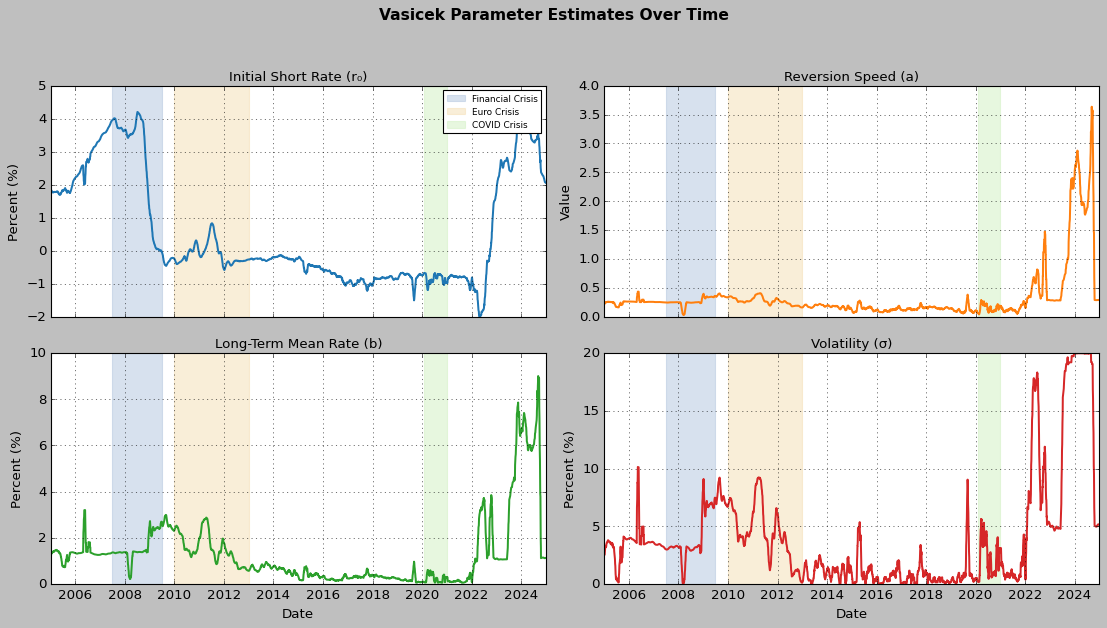

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
import fixed_income_derivatives_E2024 as fid

# === 1) Prepare data ===
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"])
T = np.array([0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0])
rates_cols = ["3M", "6M", "1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]
R_market_series = df_merged[rates_cols].values / 100.0
dates = df_merged["DATE"]

params = []       # To store parameter estimates
rmse_list = []    # To store RMSE and MAE

# === 2) Loop through all dates and calibrate Vasicek ===
for i, row in enumerate(R_market_series):
    R_market = row
    date_i = dates.iloc[i]
    init_guess = [R_market[0], 0.2, 0.03, 0.01]

    res = minimize(
    lambda p: fid.fit_vasicek_obj(p, R_market, T),
    x0=init_guess,
    method="L-BFGS-B",
    bounds = [
    (-0.02, 0.10),   # r0: initial short rate, allows for slightly negative rates
    (0.001, 5.0),    # a: mean reversion speed, must be strictly positive
    (-0.02, 0.10),   # b: long-term mean rate, allows for low/negative rates
    (0.0001, 0.20)   # sigma: volatility, must be strictly positive
    ]
)


    if res.success:
        r0, a, b, sigma = res.x
        params.append([date_i, r0, a, b, sigma])

        R_model = fid.spot_rate_vasicek(r0, a, b, sigma, T)
        rmse = np.sqrt(np.mean((R_market - R_model) ** 2))
        mae = np.mean(np.abs(R_market - R_model))
        rmse_list.append([date_i, rmse, mae])
    else:
        print(f"⚠️ Optimization failed for date {date_i}")

# === 3) Convert to DataFrames ===
df_params = pd.DataFrame(params, columns=["DATE", "r0", "a", "b", "sigma"]).set_index("DATE")
df_errors = pd.DataFrame(rmse_list, columns=["DATE", "RMSE", "MAE"]).set_index("DATE")

# === 4) Remove outliers (e.g., sigma > 20%) ===
df_params_clean = df_params[df_params["sigma"] < 0.2]
valid_dates = df_params_clean.index
df_errors_clean = df_errors.loc[valid_dates]

# === 5) Calculate average parameters (cleaned) ===
avg = df_params_clean.mean()
print("\n📊 Average Vasicek Parameters:")
print(f"r0    = {avg['r0'] * 100:.4f}%")
print(f"a     = {avg['a']:.4f}")
print(f"b     = {avg['b'] * 100:.4f}%")
print(f"sigma = {avg['sigma'] * 100:.4f}%")

# === 6) Overall error metrics ===
rmse_all = np.sqrt(np.mean(df_errors_clean["RMSE"]**2))
mae_all  = df_errors_clean["MAE"].mean()

print(f"\n📉 Overall RMSE: {rmse_all:.6f}")
print(f"📉 Overall MAE : {mae_all:.6f}")

# === 7) Save to CSV (optional) ===
df_params_clean.to_csv("vasicek_filtered_params.csv")
df_errors_clean.to_csv("vasicek_filtered_errors.csv")

# === 8) Rolling mean smoothing for plotting ===
df_smoothed = df_params_clean.rolling(window=20, min_periods=5).mean()

# === 9) Plot each parameter separately ===
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axs = axs.flatten()

param_names = ["r0", "a", "b", "sigma"]
titles = [
    "Initial Short Rate (r₀)",
    "Reversion Speed (a)",
    "Long-Term Mean Rate (b)",
    "Volatility (σ)"
]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Find actual date range in the data
start_date = df_smoothed.index.min()
end_date = df_smoothed.index.max()

# Define crisis periods
crisis_periods = [
    ("Financial Crisis", "2007-07-01", "2009-06-30", "#B0C4DE"),
    ("Euro Crisis", "2010-01-01", "2012-12-31", "#F5DEB3"),
    ("COVID Crisis", "2020-02-01", "2020-12-31", "#D0F0C0")
]

for i, param in enumerate(param_names):
    # Add crisis shadings first
    for crisis, start, end, color in crisis_periods:
        axs[i].axvspan(pd.to_datetime(start), pd.to_datetime(end), 
                      color=color, alpha=0.5, label=crisis if i == 0 else "")
    
    # Plot the parameter data - convert to percentage for all except 'a'
    if param != 'a':
        axs[i].plot(df_smoothed.index, df_smoothed[param] * 100, color=colors[i], linewidth=1.8)
        axs[i].set_ylabel("Percent (%)")
    else:
        axs[i].plot(df_smoothed.index, df_smoothed[param], color=colors[i], linewidth=1.8)
        axs[i].set_ylabel("Value")
    
    axs[i].set_title(titles[i], fontsize=12)
    axs[i].grid(True)
    axs[i].set_xlim([start_date, end_date])
    
    # Format x-axis dates
    axs[i].xaxis.set_major_locator(mdates.YearLocator(2))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Only add crisis labels to the first plot
    if i == 0:
        axs[i].legend(loc='upper right', fontsize=8)

axs[2].set_xlabel("Date")
axs[3].set_xlabel("Date")
plt.suptitle("Vasicek Parameter Estimates Over Time", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()